# Imports

In [55]:
# Pandas
import pandas as pd

# Numpy
import numpy as np

# SKLearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Scipy
from scipy.spatial.distance import cdist

# Matplotlib
import matplotlib.pyplot as plt

# Math
from math import pi

# OS
import os

# Retriving data

In [11]:
df = pd.read_csv("etude_marche_080122.tsv", sep="\t")
df.head()

,Horodateur,Consommez-vous de l'alcool ?,Quel type d'alcool ?,A quelle fréquence ?,Quelle est votre tranche d'âge ?,A quelle catégorie de population pensez-vous appartenir ?,Possédez-vous une cave à vin ?,Combien de bouteilles peut-elle accueillir ?,Avez-vous déjà perdu ou oublié l'existence d'une de vos bouteilles ?,Utilisez-vous une application de gestion pour votre cave ?,...,Aimeriez-vous pouvoir retrouver une bouteille sans avoir à fouiller dans toute votre cave ?,Avez-vous de bonnes connaissances en vin ?,Selon vous quel est votre niveau en œnologie ?,"Aimeriez-vous avoir des recommandations de vins en fonction de vous, vos goûts, vos habitudes etc ?",Aimeriez-vous avoir des recommandations de vins en fonctions des plats que vous allez servir lors d'un repas ?,Aimeriez-vous en apprendre d'avantage sur les vins que vous consommez ?,Sur quel type d'appareil souhaiteriez-vous utiliser cette application ?,Pour avoir cette application quel prix seriez-vous prêt à dépenser chaque mois pour cette application ?,Une version gratuite avec des options supplémentaires en version payante vous conviendrait-elle ?,Auriez-vous des remarques à ajouter ?
0,15/12/2021 11:16:34,Non,Aucun,0,18 - 25 ans,Etudiant,Non,0.0,Non,Non,...,Oui,Non,0.0,Oui,Oui,Oui,"Téléphone (iPhone ou Android indifféremment), ...",5 - 10 €,Oui,NaN
1,15/12/2021 11:19:23,Oui,"Vin effervescent (Champagne, Clairette de Die,...",2,18 - 25 ans,Etudiant,Non,NaN,Oui,Non,...,Oui,Non,1.0,Oui,Oui,Oui,"Téléphone (iPhone ou Android indifféremment), ...","Gratuit, - de 5€",Oui,NaN
2,15/12/2021 11:20:29,Oui,Bière,1,18 - 25 ans,Etudiant,Non,NaN,Non,Non,...,Oui,Non,0.0,Non,Oui,Oui,Téléphone (iPhone ou Android indifféremment),Gratuit,Oui,NaN
3,15/12/2021 11:24:25,Non,Aucun,0,18 - 25 ans,Etudiant,Non,0.0,Non,Non,...,Non,Non,0.0,Non,Oui,Non,"Téléphone (iPhone ou Android indifféremment), ...","Gratuit, - de 5€",Oui,NaN
4,15/12/2021 11:24:31,Oui,"Vin effervescent (Champagne, Clairette de Die,...",1,18 - 25 ans,Etudiant,Non,0.0,Non,Non,...,Oui,Non,2.0,Non,Oui,Oui,"Téléphone (iPhone ou Android indifféremment), ...","Gratuit, - de 5€",Non,Non


## Definitions

In [12]:
colPop = "A quelle catégorie de population pensez-vous appartenir ?"
colDev = "Sur quel type d'appareil souhaiteriez-vous utiliser cette application ?"
colPrice = "Pour avoir cette application quel prix seriez-vous prêt à dépenser chaque mois pour cette application ?"
colRem = "Auriez-vous des remarques à ajouter ?"
colCave = "Combien de bouteilles peut-elle accueillir ?"
colAge = "Quelle est votre tranche d'âge ?"
BoolQuestions = [
    "Consommez-vous de l'alcool ?",
    "Possédez-vous une cave à vin ?",
    "Avez-vous déjà perdu ou oublié l'existence d'une de vos bouteilles ?",
    "Utilisez-vous une application de gestion pour votre cave ?",
    "Utilisez-vous un cahier pour gérer votre cave ?",
    "Pensez-vous que l'utilisation d'une application gérant votre cave de manière automatique pourrait vous aider ?",
    "Aimeriez-vous pouvoir retrouver une bouteille sans avoir à fouiller dans toute votre cave ?",
    "Avez-vous de bonnes connaissances en vin ?",
    "Aimeriez-vous avoir des recommandations de vins en fonction de vous, vos goûts, vos habitudes etc ?",
    "Aimeriez-vous avoir des recommandations de vins en fonctions des plats que vous allez servir lors d'un repas ?",
    "Aimeriez-vous en apprendre d'avantage sur les vins que vous consommez ?",
    "Une version gratuite avec des options supplémentaires en version payante vous conviendrait-elle ?"
]
IntensiveQuestions = [
    "Quelle est votre tranche d'âge ?",
    "A quelle fréquence ?",
    "Combien de bouteilles peut-elle accueillir ?",
    "Selon vous quel est votre niveau en œnologie ?",
    "Pour avoir cette application quel prix seriez-vous prêt à dépenser chaque mois pour cette application ?"
]

# Cleaning Data

## tranforming Oui, Non and NaN values into ones and zeros

In [13]:
for col in df.columns:
    df[col] = df[col].apply(lambda x : 1 if x == "Oui" else x)
    df[col] = df[col].apply(lambda x : 0 if x == "Non" else x)
    df[col] = df[col].apply(lambda x : 0 if str(x) == "nan" else x) # NaN = Not a Number

## Cleaning gender and abnormal values

In [14]:
categoriesToUpdate = [
    "Etudiant",
    "Employé",
    "Retraité",
    "Dirigeant"
]
for cat in categoriesToUpdate:
    df[colPop] = df[colPop].apply(lambda x : cat+"(e)" if x == cat else x)
    
df[colPop] = df[colPop].apply(
    lambda x : "Auto-entrepreneur / Auto-entrepreneuse" if x == "Auto-entrepreneur" else x
)

df[colPop] = df[colPop].apply(lambda x : "Ne souhaites pas préciser" if x == "²" else x)

df[colDev] = df[colDev].apply(lambda x : "Téléphone (iPhone ou Android indifféremment)" if x == 0 else x)

index_val = df[df[colCave] == 1000].index # I doubt this one
df.drop(index_val, inplace=True)

# Use to remove underaged but seems to be buggy for now
#df = df[df[colAge] != "- 18 ans (que faîtes-vous ici ?)"]

df.head()

,Horodateur,Consommez-vous de l'alcool ?,Quel type d'alcool ?,A quelle fréquence ?,Quelle est votre tranche d'âge ?,A quelle catégorie de population pensez-vous appartenir ?,Possédez-vous une cave à vin ?,Combien de bouteilles peut-elle accueillir ?,Avez-vous déjà perdu ou oublié l'existence d'une de vos bouteilles ?,Utilisez-vous une application de gestion pour votre cave ?,...,Aimeriez-vous pouvoir retrouver une bouteille sans avoir à fouiller dans toute votre cave ?,Avez-vous de bonnes connaissances en vin ?,Selon vous quel est votre niveau en œnologie ?,"Aimeriez-vous avoir des recommandations de vins en fonction de vous, vos goûts, vos habitudes etc ?",Aimeriez-vous avoir des recommandations de vins en fonctions des plats que vous allez servir lors d'un repas ?,Aimeriez-vous en apprendre d'avantage sur les vins que vous consommez ?,Sur quel type d'appareil souhaiteriez-vous utiliser cette application ?,Pour avoir cette application quel prix seriez-vous prêt à dépenser chaque mois pour cette application ?,Une version gratuite avec des options supplémentaires en version payante vous conviendrait-elle ?,Auriez-vous des remarques à ajouter ?
0,15/12/2021 11:16:34,0,Aucun,0,18 - 25 ans,Etudiant(e),0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,"Téléphone (iPhone ou Android indifféremment), ...",5 - 10 €,1.0,0
1,15/12/2021 11:19:23,1,"Vin effervescent (Champagne, Clairette de Die,...",2,18 - 25 ans,Etudiant(e),0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,"Téléphone (iPhone ou Android indifféremment), ...","Gratuit, - de 5€",1.0,0
2,15/12/2021 11:20:29,1,Bière,1,18 - 25 ans,Etudiant(e),0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,Téléphone (iPhone ou Android indifféremment),Gratuit,1.0,0
3,15/12/2021 11:24:25,0,Aucun,0,18 - 25 ans,Etudiant(e),0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,"Téléphone (iPhone ou Android indifféremment), ...","Gratuit, - de 5€",1.0,0
4,15/12/2021 11:24:31,1,"Vin effervescent (Champagne, Clairette de Die,...",1,18 - 25 ans,Etudiant(e),0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,1.0,1.0,"Téléphone (iPhone ou Android indifféremment), ...","Gratuit, - de 5€",0.0,0


# Formating

## Setting ages to means

In [15]:
meanAge = {
    "- 18 ans (que faîtes-vous ici ?)" : 9,
    "18 - 25 ans" : 21.5,
    "25 - 30 ans" : 27.5,
    "30 - 45 ans" : 37.5,
    "45 - 55 ans" : 50,
    "55 - 65 ans" : 60,
    "+ 65 ans" : 72.5
}
df["Quelle est votre tranche d'âge ?"] = df["Quelle est votre tranche d'âge ?"].apply(
    lambda x : meanAge[x]
)

## Setting prices to means

In [16]:
meanPrice = {
    0 : 0,
    "Gratuit" : 0,
    "- de 5€" : 2.5,
    "5 - 10 €" : 7.5,
    "10 - 15 €" : 12.5,
    "+ 15 €" : 15
}

def setPriceToMean(string):
    if string == 0:
        return(0)
    r = 0
    vList = string.split(", ")
    for val in vList:
        r += meanPrice[val]
    return(r)

df[colPrice] = df[colPrice].apply(lambda x : setPriceToMean(x))

## Separating Alcohol types

In [17]:
def cleanAlcoolTypes(string):
    rList = []
    # Cleaning in-value columns
    if '(' in string:
        rList = (string[:string.find('(')-1] + string[string.find(')')+1:]).split(',')
    else:
        rList = string.split(',')
    # Cleaning spaces
    for i, s in enumerate(rList):
        if s[0] == ' ':
            rList[i] = s[1:]
    # Cleaning null values
    if rList == ["Aucun"]:
        rList = []
    return(rList)

In [18]:
df["Alcohol types list"] = df["Quel type d'alcool ?"].apply(
    lambda x : cleanAlcoolTypes(x)
)

In [19]:
# Get all alcohol types
AlcoholTypes = []
for answer in df["Alcohol types list"]:
    for AlcoholType in answer:
        if AlcoholType not in AlcoholTypes:
            AlcoholTypes.append(AlcoholType)

In [20]:
print(AlcoholTypes)

['Vin effervescentVin effervescent (Champagne', 'Clairette de Die', '...', 'Bière', 'Alcool fort', 'Liqueur', 'Cidre', 'Vin', 'Vin effervescentVin', 'Vin effervescent (Champagne', 'Clairette de...', 'Spiritueux']


In [21]:
for AlcoholType in AlcoholTypes:
    df[AlcoholType] = df["Alcohol types list"].apply(
        lambda x : 1 if AlcoholType in x else 0
    )

## Separating devices

In [22]:
def cleanDeviceTypes(string):
    string = str(string)
    rList = string.split(', ')
    return(rList)

In [23]:
df["Device types list"] = df[colDev].apply(
    lambda x : cleanDeviceTypes(x)
)

In [24]:
# Get all alcohol types
DeviceTypes = []
for answer in df["Device types list"]:
    for DeviceType in answer:
        if DeviceType not in DeviceTypes:
            DeviceTypes.append(DeviceType)

In [25]:
print(DeviceTypes)

['Téléphone (iPhone ou Android indifféremment)', '...', 'Tablette', 'La cave (directement intégré dans la...', 'Ordinateur', 'La cave (directement intégré dans la porte)']


In [26]:
for DeviceType in DeviceTypes:
    df[DeviceType] = df["Device types list"].apply(
        lambda x : 1 if DeviceType in x else 0
    )

## Separating population category

In [27]:
# Get all population category
populationCategories = []
for answer in df[colPop]:
    if answer not in populationCategories:
        populationCategories.append(answer)

In [28]:
print(populationCategories)

['Etudiant(e)', 'Employé(e)', 'Ne souhaites pas préciser', 'Agent de maîtrise', 'Dirigeant(e)', 'Cadre', 'Fonctionnaire', 'Auto-entrepreneur / Auto-entrepreneuse', 'Retraité(e)']


In [29]:
for pc in populationCategories:
    df[pc] = df[colPop].apply(
        lambda x : 1 if pc == x else 0
    )

## Removing now useless data

In [30]:
df = df.drop("Horodateur", axis=1)
df = df.drop("Quel type d'alcool ?", axis=1)
df = df.drop("Alcohol types list", axis=1)
df = df.drop("Device types list", axis=1)
df = df.drop(colRem, axis=1)
df = df.drop(colDev, axis=1)
df = df.drop(colPop, axis=1)

## Data is clean and formated

In [32]:
df.head()

,Consommez-vous de l'alcool ?,A quelle fréquence ?,Quelle est votre tranche d'âge ?,Possédez-vous une cave à vin ?,Combien de bouteilles peut-elle accueillir ?,Avez-vous déjà perdu ou oublié l'existence d'une de vos bouteilles ?,Utilisez-vous une application de gestion pour votre cave ?,Utilisez-vous un cahier pour gérer votre cave ?,Pensez-vous que l'utilisation d'une application gérant votre cave de manière automatique pourrait vous aider ?,Aimeriez-vous pouvoir retrouver une bouteille sans avoir à fouiller dans toute votre cave ?,...,La cave (directement intégré dans la porte),Etudiant(e),Employé(e),Ne souhaites pas préciser,Agent de maîtrise,Dirigeant(e),Cadre,Fonctionnaire,Auto-entrepreneur / Auto-entrepreneuse,Retraité(e)
0,0,0,21.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,0
1,1,2,21.5,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,21.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,21.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,21.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,0


# Kmean Algorithm with elbow method

## Elbow Method

In [33]:
distortions = []

K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    distortions.append(
        sum(np.min(
            cdist(df, kmeanModel.cluster_centers_, 'euclidean'),
            axis=1)
           ) / len(df))

The lower it gets, the more precise
The further the right, the more scattered the analysis is

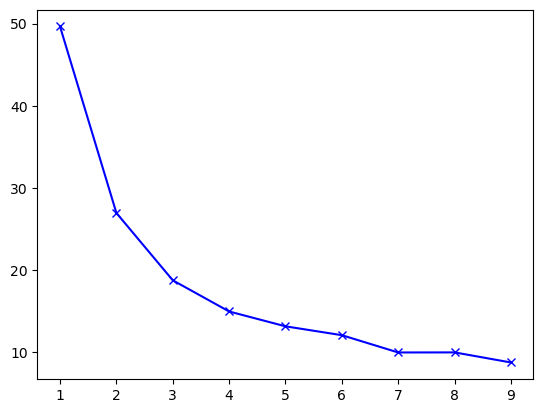

In [34]:
plt.plot(K, distortions, "b-x")
plt.show()

In [36]:
n_typeClients = 4 # Seems good following previous chart
kmeans = KMeans(n_clusters=n_typeClients, max_iter=600, algorithm = 'lloyd')
kmeans.fit(df)
centroids = kmeans.cluster_centers_

# Printing results and conclusion

In [37]:
# adding sizes
sizes = [kmeans.labels_.tolist().count(i) for i in range(n_typeClients)]
# Setting results
results = pd.DataFrame(centroids, columns=df.columns)
results.insert(0, "Group's size", 0, True)
for i in range(n_typeClients):
    results.loc[i, "Group's size"] = sizes[i]

Each row is a typical client, the values are the means of their habitus
1 = 100% yes
0 = 100% no
beware of the e-XX or e+XX

In [40]:
results

,Group's size,Consommez-vous de l'alcool ?,A quelle fréquence ?,Quelle est votre tranche d'âge ?,Possédez-vous une cave à vin ?,Combien de bouteilles peut-elle accueillir ?,Avez-vous déjà perdu ou oublié l'existence d'une de vos bouteilles ?,Utilisez-vous une application de gestion pour votre cave ?,Utilisez-vous un cahier pour gérer votre cave ?,Pensez-vous que l'utilisation d'une application gérant votre cave de manière automatique pourrait vous aider ?,...,La cave (directement intégré dans la porte),Etudiant(e),Employé(e),Ne souhaites pas préciser,Agent de maîtrise,Dirigeant(e),Cadre,Fonctionnaire,Auto-entrepreneur / Auto-entrepreneuse,Retraité(e)
0,92,0.804348,1.826087,24.364130,0.065217,1.369565,0.282609,1.086957e-02,0.01087,0.402174,...,0.01087,0.76087,3.260870e-02,4.347826e-02,0.01087,0.01087,0.097826,0.021739,3.469447e-18,0.021739
1,8,1.000000,3.875000,41.562500,1.000000,185.000000,0.875000,3.750000e-01,0.12500,0.750000,...,0.00000,0.00000,3.469447e-18,6.938894e-18,0.00000,0.12500,0.750000,0.125000,0.000000e+00,0.000000
2,3,1.000000,2.333333,56.666667,1.000000,366.666667,1.000000,6.938894e-18,0.00000,0.666667,...,0.00000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.00000,0.333333,0.000000,3.333333e-01,0.333333
3,16,1.000000,2.812500,41.187500,0.875000,64.062500,0.500000,6.250000e-02,0.06250,0.562500,...,0.00000,0.25000,-6.938894e-18,1.250000e-01,0.00000,0.06250,0.250000,0.187500,6.250000e-02,0.062500


In [47]:
def radarDiagram(row):
    Attributes = list(row.keys())
    AttNo = len(Attributes)
    
    values = row.tolist()
    values += values [:1]
    
    angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
    angles += angles [:1]

    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1],Attributes)
    ax.plot(angles,values)
    ax.fill(angles, values, 'teal', alpha=0.1)

In [48]:
def barDiagram(row):
    Attributes = list(row.keys())
    AttNo = len(Attributes)
    
    values = row.tolist()
    y_pos = np.arange(AttNo)
    
    plt.barh(y_pos, values, align='center', alpha=0.5)
    plt.yticks(y_pos, Attributes)
    plt.title('0 = Non ; 1 = Oui')

In [49]:
def printNumbers(row):
    Attributes = list(row.keys())
    AttNo = len(Attributes)
    for att in Attributes:
        print("{} : {}".format(att, row[att]))

In [56]:
def ShowClient(row, i):
    # Multiple answers questions
    Drink = row[AlcoholTypes]
    PopCat = row[populationCategories]
    Devices = row[DeviceTypes]
    # Yes or No questions
    YesOrNo = row[BoolQuestions]
    # Intensive questions
    Numbers = row[IntensiveQuestions] 
    
    printNumbers(Numbers)
    barDiagram(YesOrNo)

    os.makedirs("PDF", exist_ok=True)
    
    plt.savefig(f"PDF/out_bar_{i}.pdf", bbox_inches="tight")
    plt.show()
    radarDiagram(PopCat)
    plt.savefig(f"PDF/out_PopCat_{i}.pdf", bbox_inches="tight")
    plt.show()
    radarDiagram(Drink)
    plt.savefig(f"PDF/out_Drink_{i}.pdf", bbox_inches="tight")
    plt.show()
    radarDiagram(Devices)
    plt.savefig(f"PDF/out_Devices_{i}.pdf", bbox_inches="tight")
    plt.show()

Client n°1
Group's size : 92.0
Quelle est votre tranche d'âge ? : 24.36413043478261
A quelle fréquence ? : 1.8260869565217395
Combien de bouteilles peut-elle accueillir ? : 1.3695652173912976
Selon vous quel est votre niveau en œnologie ? : 1.8695652173913029
Pour avoir cette application quel prix seriez-vous prêt à dépenser chaque mois pour cette application ? : 1.4945652173913038


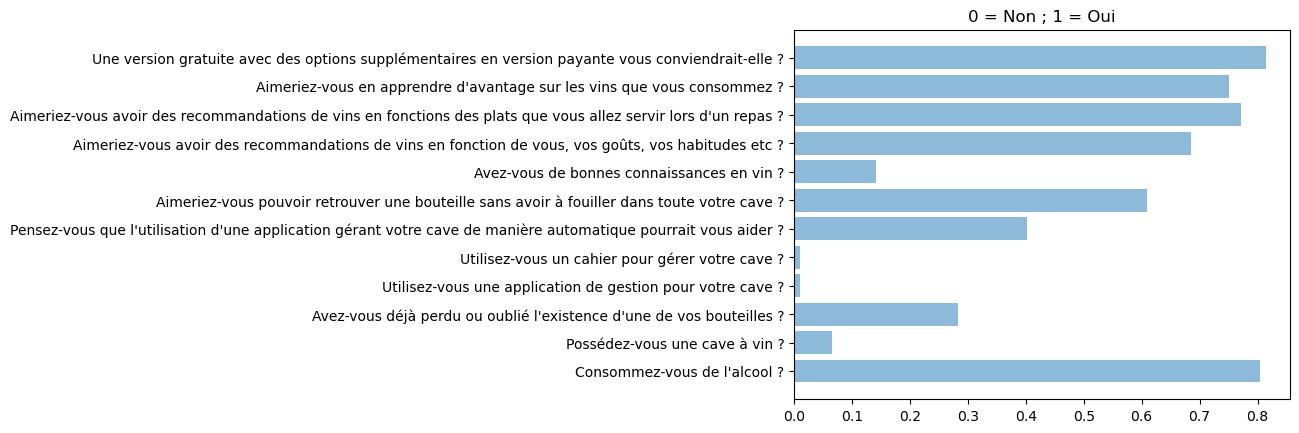

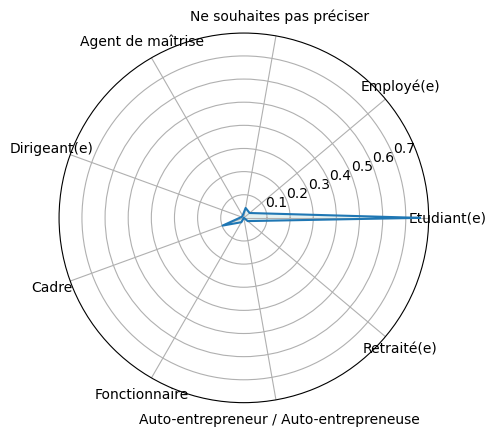

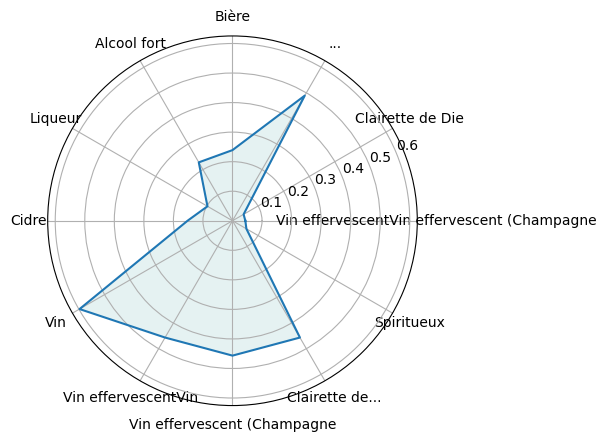

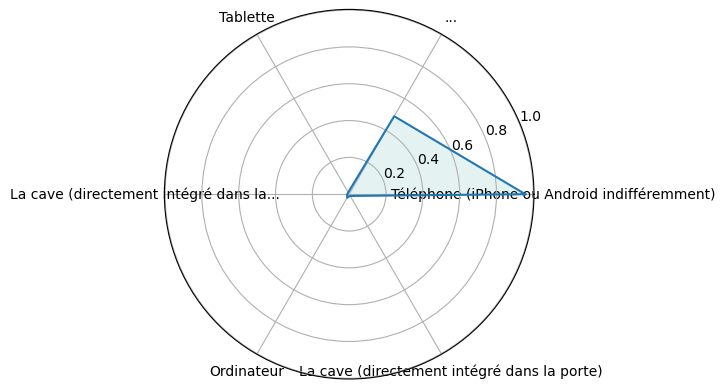

Client n°2
Group's size : 16.0
Quelle est votre tranche d'âge ? : 41.1875
A quelle fréquence ? : 2.8125000000000004
Combien de bouteilles peut-elle accueillir ? : 64.0625
Selon vous quel est votre niveau en œnologie ? : 4.5
Pour avoir cette application quel prix seriez-vous prêt à dépenser chaque mois pour cette application ? : 4.062499999999998


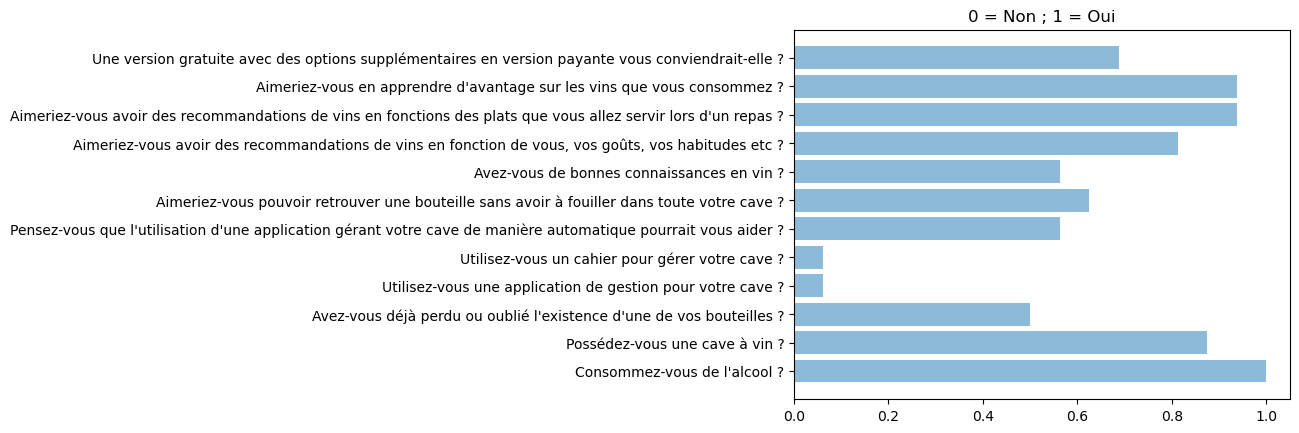

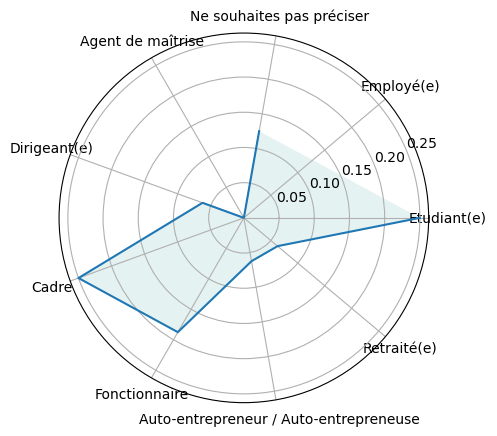

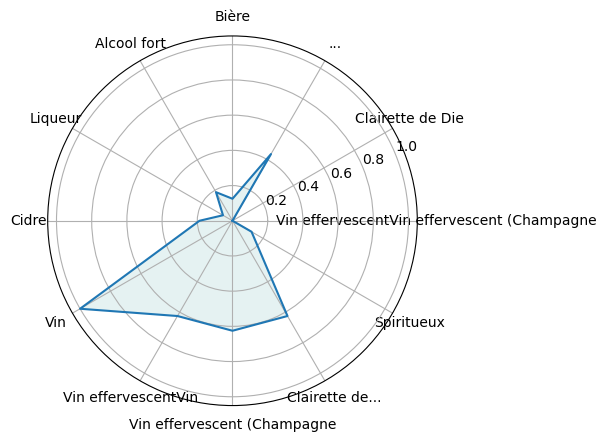

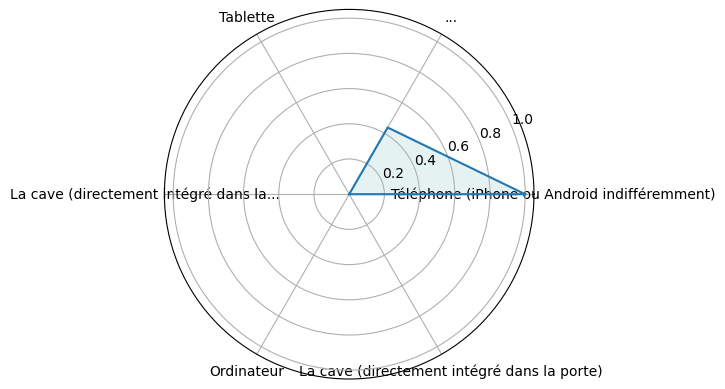

Client n°3
Group's size : 8.0
Quelle est votre tranche d'âge ? : 41.5625
A quelle fréquence ? : 3.875
Combien de bouteilles peut-elle accueillir ? : 185.0
Selon vous quel est votre niveau en œnologie ? : 3.875
Pour avoir cette application quel prix seriez-vous prêt à dépenser chaque mois pour cette application ? : 0.9375000000000002


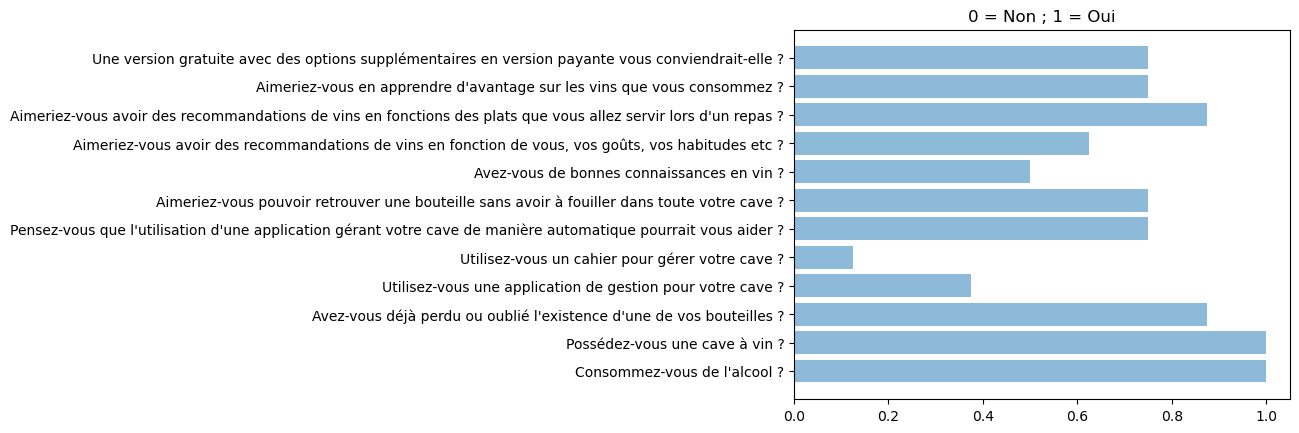

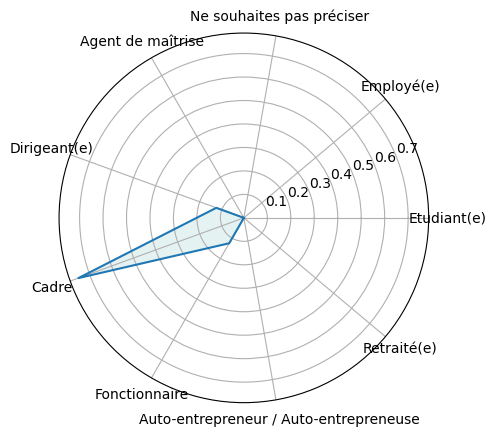

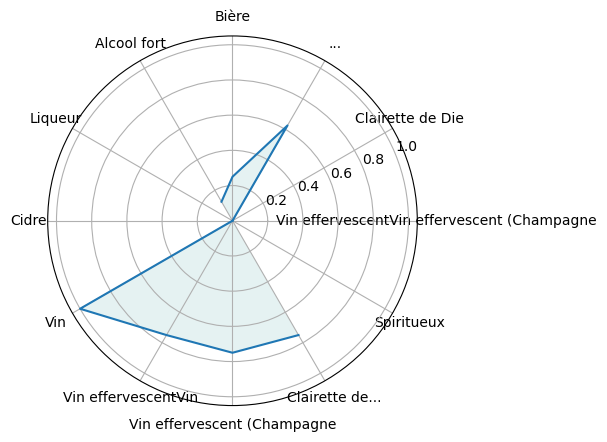

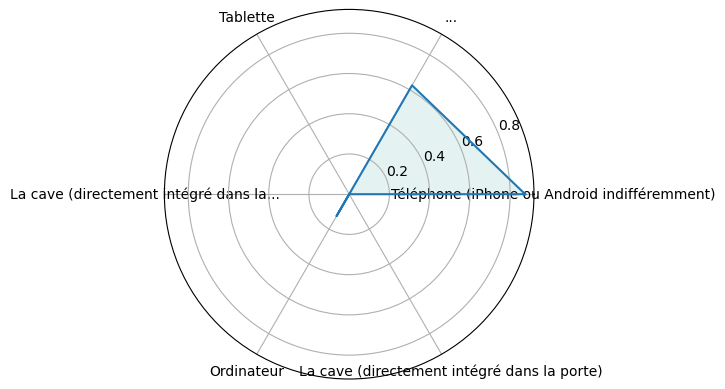

Client n°4
Group's size : 3.0
Quelle est votre tranche d'âge ? : 56.666666666666664
A quelle fréquence ? : 2.3333333333333335
Combien de bouteilles peut-elle accueillir ? : 366.66666666666663
Selon vous quel est votre niveau en œnologie ? : 4.666666666666666
Pour avoir cette application quel prix seriez-vous prêt à dépenser chaque mois pour cette application ? : 12.499999999999998


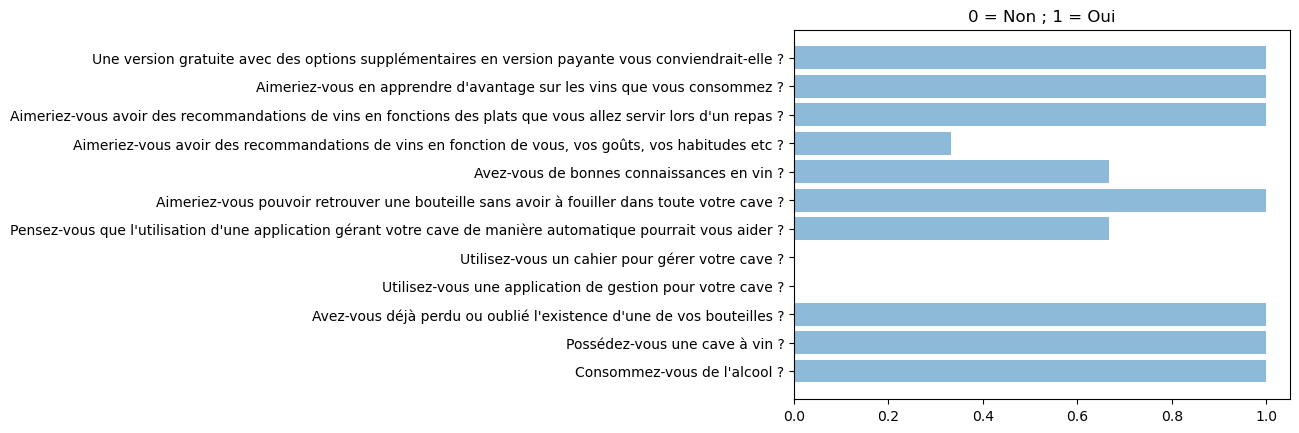

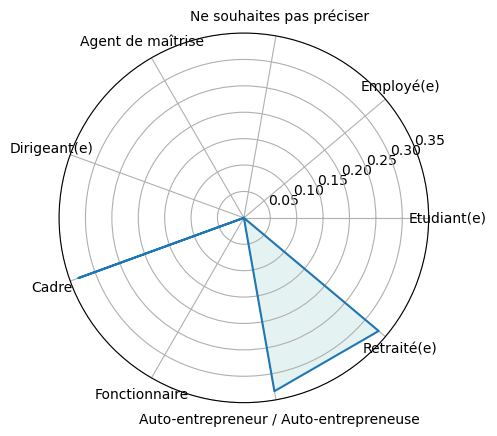

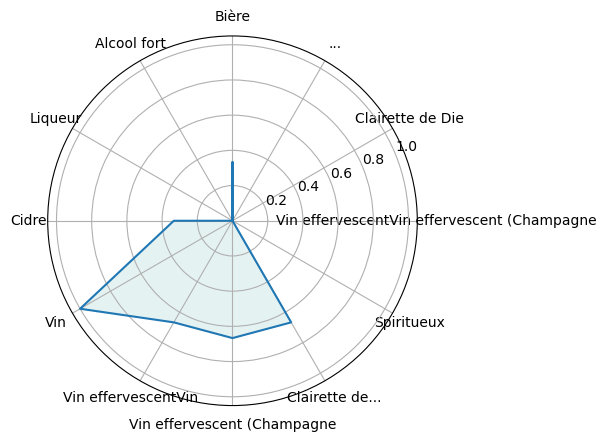

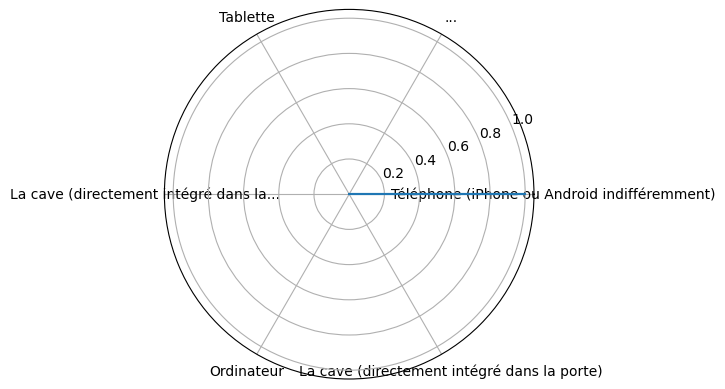

In [57]:
def PresentClients(results):
    sorted_results = results.sort_values(by=["Group's size"], ascending=False) # sorting
    for clientId in range(len(results)):
        print("Client n°{}".format(clientId+1))
        print("Group's size : {}".format(sorted_results.iloc[clientId]["Group's size"]))
        ShowClient(sorted_results.iloc[clientId], clientId)

PresentClients(results)

## Saving results to csv

In [46]:
results.to_csv("results.tsv", sep='\t')